In [3]:
# Contrast Stretching
from PIL import Image
import matplotlib.image # can be used instead of Image
import matplotlib.pyplot as plt
from numpy import asarray
import numpy as np

In [4]:
# 
def median_filter(image_array):
    image_shape = image_array.shape
    # taking the width and height of the image
    width = image_shape[1]
    # converting the image to a vector to ease the computations
    # make a 1-dimensional view of arr
    #vector = image_array.ravel().copy()
    vector_real = image_array.ravel().copy()
    print(f"before the loop : {len(vector_real)}")
    for index, x in enumerate(vector_real):
        if ((index+1)%width-1!=1 and index%width!=0 and index>width-1 and index<len(vector_real)-width-1): # aviod edges 2d arrays for median filter
            median_pixel_value = [
            vector_real[index-width-1],vector_real[index-width],vector_real[index-width+1],
            vector_real[index-1],vector_real[index],vector_real[index+1]
            ,vector_real[index+width-1],vector_real[index+width],vector_real[index+width+1]] 
            median_pixel_value.sort()
            vector_real[index] = median_pixel_value[len(median_pixel_value) // 2]  
    # converting the vector back to the shape of the image
    image_array_after = np.asarray(vector_real).reshape(image_shape)
    return image_array_after

(256, 256)
before the loop : 65536
time taken by median filter : 0.2065117359161377


Text(0.5, 1.0, 'after')

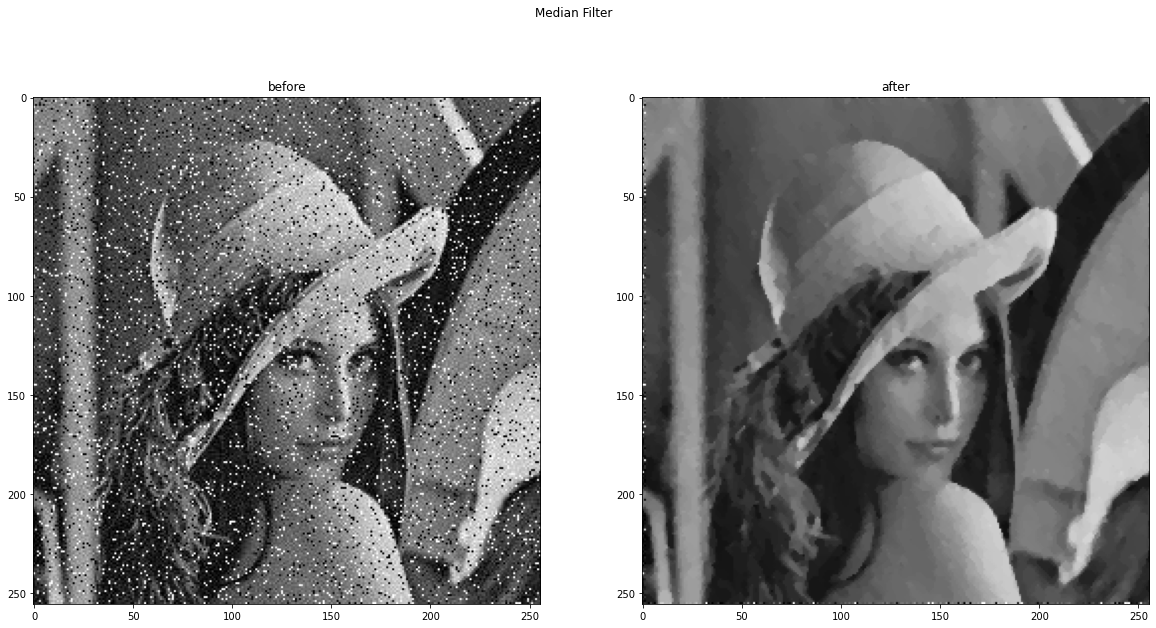

In [85]:
# my code is faster
image = Image.open("salt_pepper_image.jpg").convert('L')
# converting image to array
image_array = asarray(image)
# showing the shape of the image
print(image_array.shape)
# doing the clipping filter on the image array
start = time.time()
image_array_after = median_filter(image_array)
end = time.time()
print(f"time taken by median filter : {end - start}")
# converting the image back from the array
image_after = Image.fromarray(image_array_after)
# showing the image before and after the operations
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Median Filter")
fig.add_subplot(1, 2, 1)
# showing the image before range compression
plt.imshow(image, cmap="gray")
plt.title("before")
# showing the image after range compression
fig.add_subplot(1, 2, 2)
plt.imshow(image_after, cmap="gray")
plt.title("after")

time taken by median filter : 0.505136251449585


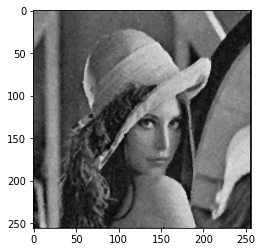

In [78]:
# some code in github
import numpy
from PIL import Image


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("salt_pepper_image.jpg").convert("L")
    arr = numpy.array(img)
    start = time.time()
    removed_noise = median_filter(arr, 3)
    end = time.time()
    print(f"time taken by median filter : {end - start}")
    img = Image.fromarray(removed_noise)
    plt.imshow(img, cmap="gray")


main()